# 2D TFIM: Result comparisons (10000 samples)

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In this notebook, I compare the results obtained from 1D Euclidean GRU, 2D Euclidean RNN and 1D Hyperbolic GRU. 
The results collated below are from the training and inference notebooks for each case. The 2D TFIM setting is J=1.0, B=3.0, with 4 square lattice sizes $(N_x, N_y) = (5,5), (7,7), (8,8), (9,9)$. 

The inference results were obtained with 10000 samples. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utility')
numsamples = 10000

## Inference results

In [2]:
names = ['1d-eGRU-50', '1d-hGRU-50', '2d-eRNN-50', 'DMRG']
N55 = [-78.3274, -78.3385, -78.6554,-78.6857]
N55v = [3.572, 3.7901, 0.3227, 0.0]

#5k samples
#N55 = [-78.3383, -78.3399,  -78.6555,-78.6857]
#N55v = [3.6982, 3.8392, 0.3194, 0.0]

N77 = [-153.7647,  -154.2155,  -154.7942, -154.8463]
N77v=[13.8627, 7.5879, 0.4958, 0.0]
#5k samples
#N77 = [-153.7619,  -154.1937,  -154.8144, -154.8463]
#N77v=[13.9897, 7.6196, 0.5097, 0.0]

N88 = [-200.679, -201.5419, -202.3941,  -202.5077]
N88v=[20.266, 10.8321, 1.2891, 0.0]
#5k samples
#N88 = [-200.6082,-200.5608, -202.3916,  -202.5077]
#N88v=[24.5876, 29.5273, 1.2364, 0.0]

N99 = [-254.0806,-254.8021, -256.4609, -256.5535]
N99v=[32.5349, 22.6555,  0.9546, 0.0]
#5k samples
#N99 = [-254.062,-254.8933, -256.4804, -256.5535]
#N99v=[32.4207, 22.9148,  0.9659, 0.0]

dd = {'names': names, 'N55': N55, 'N55v': N55v,'N77': N77, 'N77v': N77v,
     'N88': N88, 'N88v': N88v,'N99': N99, 'N99v': N99v}
df=pd.DataFrame(dd)
df.set_index('names', inplace = True)

#this is for plotting
df['se_55'] = df['N55v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_77'] = df['N77v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_88'] = df['N88v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_99'] = df['N99v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df.drop(['N55v', 'N77v', 'N88v', 'N99v'], axis = 1, inplace = True)

df

,N55,N77,N88,N99,se_55,se_77,se_88,se_99
names,,,,,,,,
1d-eGRU-50,-78.3274,-153.7647,-200.6790,-254.0806,0.019,0.037,0.045,0.057
1d-hGRU-50,-78.3385,-154.2155,-201.5419,-254.8021,0.019,0.028,0.033,0.048
2d-eRNN-50,-78.6554,-154.7942,-202.3941,-256.4609,0.006,0.007,0.011,0.010
DMRG,-78.6857,-154.8463,-202.5077,-256.5535,0.000,0.000,0.000,0.000


In [3]:
#create a new data frame 
names_2 = ['1D-eGRU','--', '1D-hGRU','--', '2D-eRNN','--', 'Exact','--']
def Nt(N,Nv):
    Nt = []
    for (k,j) in zip(N, Nv): 
        Nt.append(k)
        Nt.append(j)
    return Nt

dd2 = {'names': names_2, 'N55': Nt(N55, df['se_55']), 'N77': Nt(N77, df['se_77']), 
      'N88': Nt(N88, df['se_88']),'N99': Nt(N99, df['se_99'])}
df2 = pd.DataFrame(dd2)
df2.set_index('names', inplace = True)
df2

,N55,N77,N88,N99
names,,,,
1D-eGRU,-78.3274,-153.7647,-200.6790,-254.0806
--,0.0190,0.0370,0.0450,0.0570
1D-hGRU,-78.3385,-154.2155,-201.5419,-254.8021
--,0.0190,0.0280,0.0330,0.0480
2D-eRNN,-78.6554,-154.7942,-202.3941,-256.4609
--,0.0060,0.0070,0.0110,0.0100
Exact,-78.6857,-154.8463,-202.5077,-256.5535
--,0.0000,0.0000,0.0000,0.0000


# Comparison plot

In [4]:
#namesl = ['1D-eGRU', '1D-hGRU', '2D-eRNN']
namesl = ['1D-eGRU', '1D-hGRU']
def data_interval(data):
    data = {
       'x': data['x'],
        'y1': [y - e for y, e in zip(data['y'], data['yerr'])],
        'y2': [y + e for y, e in zip(data['y'], data['yerr'])]}
    return data

def plot_ax_errorbar(ax, df,  N, E_e, ylim, yr):
    x = np.arange(len(df.index))
    d_i = {'x': x, 'y': df[f'N{N}'], 'yerr': df[f'se_{N}']}

    ax.bar(x, df[f'N{N}'], color = 'lightblue')
    ax.errorbar(**d_i, alpha=.75,  color='green',fmt='o', ecolor = 'purple',
                      capsize=4, capthick=2, label= 'VMC')

    
    ax.axhline(E_e, color = 'red', label='DMRG')
    if ylim:
        ax.set_ylim(E_e-yr[0], E_e+yr[1])
    ax.set_xticks(range(len(x)), labels=namesl,
                  rotation=90, ha="right", rotation_mode="anchor", fontsize = 14)
    ax.set_title(f'$N_x$ = {np.int32(N/11)}, $N_y$ = {np.int32(N/11)} ', fontsize = 18)
    ax.set_ylabel('Mean energy',fontsize = 14)
    ax.xaxis.grid(True)
    ax.legend(loc='best')

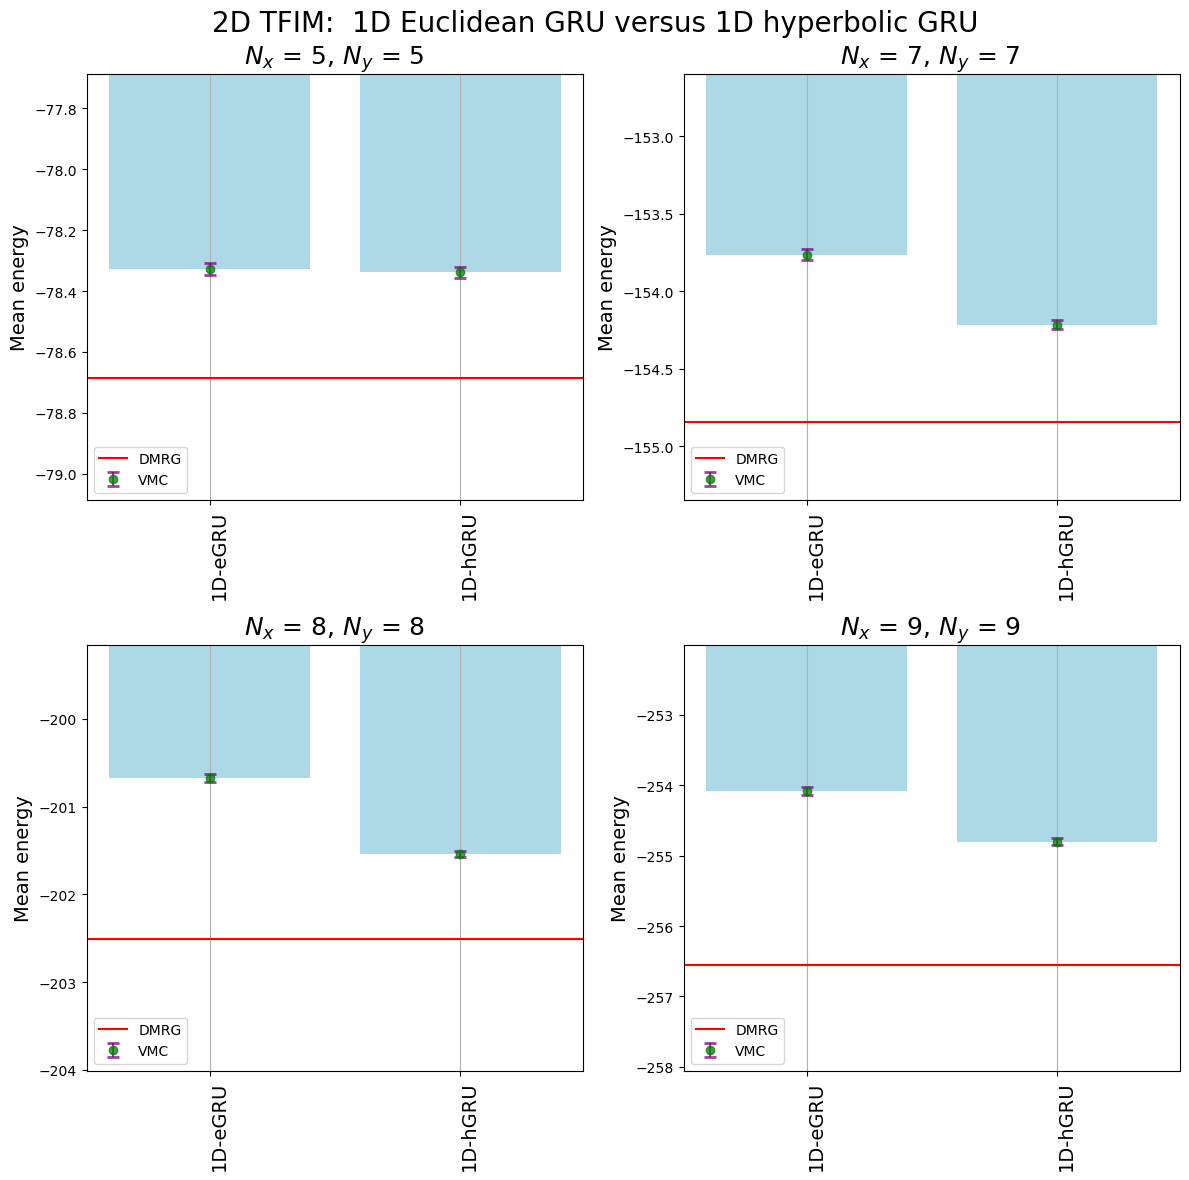

In [5]:
df3 = df[:2]
fig, ax = plt.subplots(2,2, figsize = (12,12), tight_layout = True)
plot_ax_errorbar(ax[0,0], df3, 55, -78.6857, ylim = True, yr=[0.4, 1.0])
plot_ax_errorbar(ax[0,1], df3,  77, -154.8463, ylim = True, yr=[0.5, 2.25])
plot_ax_errorbar(ax[1,0], df3,  88, -202.5077, ylim = True, yr=[1.5, 3.35])
plot_ax_errorbar(ax[1,1], df3,  99, -256.5535, ylim = True, yr=[1.5, 4.55])

fig.suptitle('2D TFIM:  1D Euclidean GRU versus 1D hyperbolic GRU', fontsize = 20)
plt.savefig('2d_tfim_comparison_10k.png')